In [2]:
#First, we can use the make_classification() function to create a synthetic binary classification 
#problem with 1,000 examples and 20 input features.
#The complete example is listed below.
# compare standalone models for binary classification
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from matplotlib import pyplot

In [22]:
# klasifikasi model tunggal

# test classification dataset 
# membuat dataset palsu dengan ribuan data
def get_dataset():
    X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, 
    random_state=1)
    return X, y

In [21]:
print(get_dataset())

(array([[  2.47475454,   0.40165523,   1.68081787, ...,  -6.59044146,
         -2.21290585,  -3.139579  ],
       [  0.84802507,   2.81841945,  -2.76008732, ...,   3.00844461,
          0.78661954,  -1.27681551],
       [ -1.90041246,  -0.56901823,  -1.76220236, ...,   3.37336417,
         -2.28613707,   1.90344983],
       ...,
       [  0.7673844 ,  -2.91920559,   2.80851577, ...,   4.42591832,
          0.46321196,  -3.30523346],
       [  2.05510667,  -0.99009741,   0.73577291, ...,   3.05100898,
         -1.40715279,  -0.51579331],
       [-10.96847792,  -2.39810735,  -0.96700953, ..., -11.16298557,
          1.16646392,   0.60835176]]), array([0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1,

In [23]:
# get a list of models to evaluate
def get_models():
    models = dict()
    models['lr'] = LogisticRegression()
    models['knn'] = KNeighborsClassifier()
    models['cart'] = DecisionTreeClassifier()
    models['svm'] = SVC()
    models['bayes'] = GaussianNB()
    return models

>lr 0.866 (0.029)
>knn 0.931 (0.025)
>cart 0.828 (0.041)
>svm 0.957 (0.020)
>bayes 0.833 (0.031)


C:\Users\lenovo\AppData\Local\Temp\ipykernel_3460\2549232817.py:17: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  pyplot.boxplot(results, labels=names, showmeans=True)


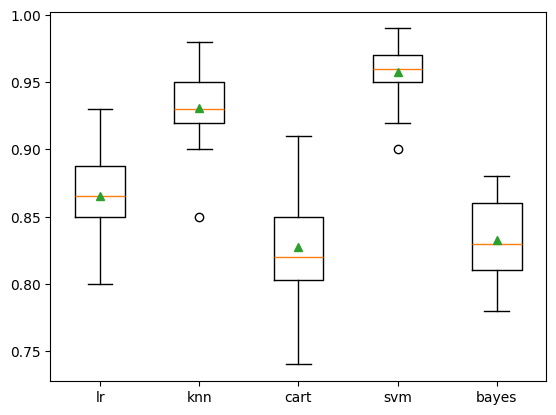

In [20]:
def evaluate_model(model, X, y):
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1) #data akan di splot 10, 
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise') #membagi data trening dan data testing
    return scores 

# menjalankan proses clasifikasi one by one
# define dataset
X, y = get_dataset() 
# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
    scores = evaluate_model(model, X, y)
    results.append(scores)
    names.append(name)
    print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()


In [24]:
from sklearn.ensemble import StackingClassifier
#STACKING
# get a stacking ensemble of models
def get_stacking():
# define the base models
    level0 = list()
    level0.append(('lr', LogisticRegression()))
    level0.append(('knn', KNeighborsClassifier()))
    level0.append(('cart', DecisionTreeClassifier()))
    level0.append(('svm', SVC()))
    level0.append(('bayes', GaussianNB()))
    # define meta learner model
    level1 = LogisticRegression()
    # define the stacking ensemble
    model = StackingClassifier(estimators=level0, final_estimator=level1, cv=5)
    return model

In [25]:
def get_modelstacking():
    models = dict()
    models['lr'] = LogisticRegression()
    models['knn'] = KNeighborsClassifier()
    models['cart'] = DecisionTreeClassifier()
    models['svm'] = SVC()
    models['bayes'] = GaussianNB()
    models['stacking'] = get_stacking()
    return models

>lr 0.866 (0.029)
>knn 0.931 (0.025)
>cart 0.822 (0.045)
>svm 0.957 (0.020)
>bayes 0.833 (0.031)
>stacking 0.963 (0.020)


C:\Users\lenovo\AppData\Local\Temp\ipykernel_3460\931038658.py:18: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  pyplot.boxplot(results, labels=names, showmeans=True)


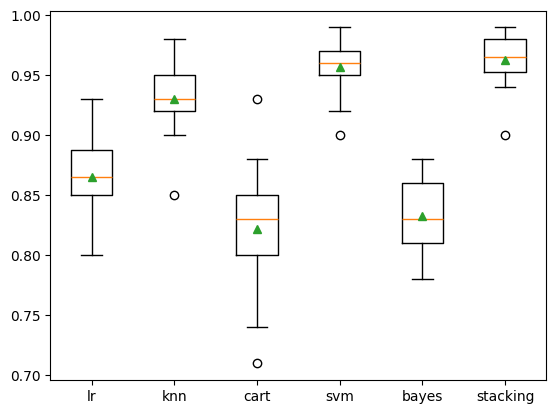

In [26]:
# evaluate a give model using cross-validation
def evaluate_model_stacking(model, X, y):
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
    return scores
# define dataset
X, y = get_dataset()
# get the models to evaluate
models = get_modelstacking()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
    scores = evaluate_model_stacking(model, X, y)
    results.append(scores)
    names.append(name)
    print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()